In [7]:
# Loading the provided CSV file to analyze its structure and content.
import pandas as pd

# Load the dataset to examine its structure and preview the first few rows
file_path = "../synthetic_data.csv"
data = pd.read_csv(file_path)

# Displaying the first few rows to understand its columns and data types
data.head()



,role,frequency_of_travel,primary_purpose,travel_days,travel_hours,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,...,additional_features_frequency,additional_features_seats,additional_features_cleanliness,additional_features_comfortable,additional_features_route_coverage,additional_features_updates,issues_with_quality_of_info,special_events,seasonal_changes,is_valid
0,Undergraduate student,Daily,Commute to classes,"Monday, Tuesday, Wednesday, Thursday, Friday","0900 - 1000, 1000 - 1100, 1100 - 1200, 1200 - ...",A2,Opp University Hall,Ventus,Friday,09:30:00,...,1,2,6,5,2,3,Yes,3,"No, service is consistent",True
1,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","0900 - 1000, 1100 - 1200, 1300 - 1400, 1500 - ...",D2,KR MRT,UTown,Thursday,09:30:00,...,1,2,6,5,4,3,No,4,"No, service is consistent",True
2,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","1700 - 1800, 1800 - 1900, 2100 - 2200, 2200 - ...",A2,UHC,S17,Thursday,17:50:00,...,1,4,6,5,2,6,No,3,"Yes, service improves/worsens (please specify ...",True
3,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Thursday, Friday, Saturday, Sunday","1100 - 1200, 1200 - 1300, 1800 - 1900, 2100 - ...",A1,PGP Terminal,Opp UHC,Sunday,11:30:00,...,1,2,5,6,6,3,No,3,"No, service is consistent",True
4,Undergraduate student,1 - 2 days a week,Commute to classes,"Tuesday, Thursday, Friday","0700 - 0800, 1000 - 1100, 1100 - 1200, 1200 - ...",A1,KR MRT,LT27,Friday,07:50:00,...,1,2,6,5,4,2,No,1,"Yes, service improves/worsens (please specify ...",True


In [8]:
# Display basic information and check for missing values
print("\nDataset info:")
print(data.info())
print("\nMissing values per column:")
print(data.isnull().sum())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55850 entries, 0 to 55849
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   role                                     55850 non-null  object
 1   frequency_of_travel                      55850 non-null  object
 2   primary_purpose                          55850 non-null  object
 3   travel_days                              55850 non-null  object
 4   travel_hours                             55850 non-null  object
 5   ISB_Service                              55850 non-null  object
 6   bus_stop_board                           55850 non-null  object
 7   bus_stop_alight                          55850 non-null  object
 8   day_of_the_week                          55850 non-null  object
 9   time_start                               55850 non-null  object
 10  travel_duration                          55

In [9]:
# Fill missing values (example: fill with mode for categorical, mean for numerical)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

# Verify that missing values have been handled
print("\nMissing values after cleaning:")
print(data.isnull().sum())



Missing values after cleaning:
role                                       0
frequency_of_travel                        0
primary_purpose                            0
travel_days                                0
travel_hours                               0
ISB_Service                                0
bus_stop_board                             0
bus_stop_alight                            0
day_of_the_week                            0
time_start                                 0
travel_duration                            0
frequency                                  0
punctuality                                0
cleanliness                                0
safety                                     0
coverage                                   0
crowdedness                                0
usage_influence_convenience                0
usage_influence_cost                       0
usage_influence_lack_of_options            0
usage_influence_availability_of_parking    0
usage_influence_environ

C:\Users\jingc\AppData\Local\Temp\ipykernel_21292\1873046637.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\jingc\AppData\Local\Temp\ipykernel_21292\1873046637.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [10]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Check the first few rows to verify encoding
print("\nData after encoding categorical variables:")
print(data.head())



Data after encoding categorical variables:
   role  frequency_of_travel  primary_purpose  travel_days  travel_hours  \
0     1                    2                1           12            18   
1     1                    1                1           16            29   
2     1                    1                1           16            69   
3     1                    1                1            5            45   
4     1                    0                1           21             2   

   ISB_Service  bus_stop_board  bus_stop_alight  day_of_the_week  time_start  \
0            1              14               17                0        1949   
1            4               6               16                4        1949   
2            1              19               15                4       13175   
3            0              17               12                3        4898   
4            0               6                7                0          47   

   ...  additional

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display first few rows to verify scaling
print("\nData after scaling numerical features:")
print(data.head())



Data after scaling numerical features:
       role  frequency_of_travel  primary_purpose  travel_days  travel_hours  \
0 -0.212276             0.971930        -0.144136    -0.017543     -0.822345   
1 -0.212276            -0.184735        -0.144136     0.608817     -0.251801   
2 -0.212276            -0.184735        -0.144136     0.608817      1.822905   
3 -0.212276            -0.184735        -0.144136    -1.113674      0.578081   
4 -0.212276            -1.341400        -0.144136     1.391768     -1.652227   

   ISB_Service  bus_stop_board  bus_stop_alight  day_of_the_week  time_start  \
0    -0.805074        0.945641         1.641438        -1.055574   -1.511263   
1     0.829443       -0.470836         1.467855         0.573423   -1.511263   
2    -0.805074        1.830939         1.294273         0.573423    0.971584   
3    -1.349913        1.476820         0.773524         0.166174   -0.859035   
4    -1.349913       -0.470836        -0.094391        -1.055574   -1.931927   

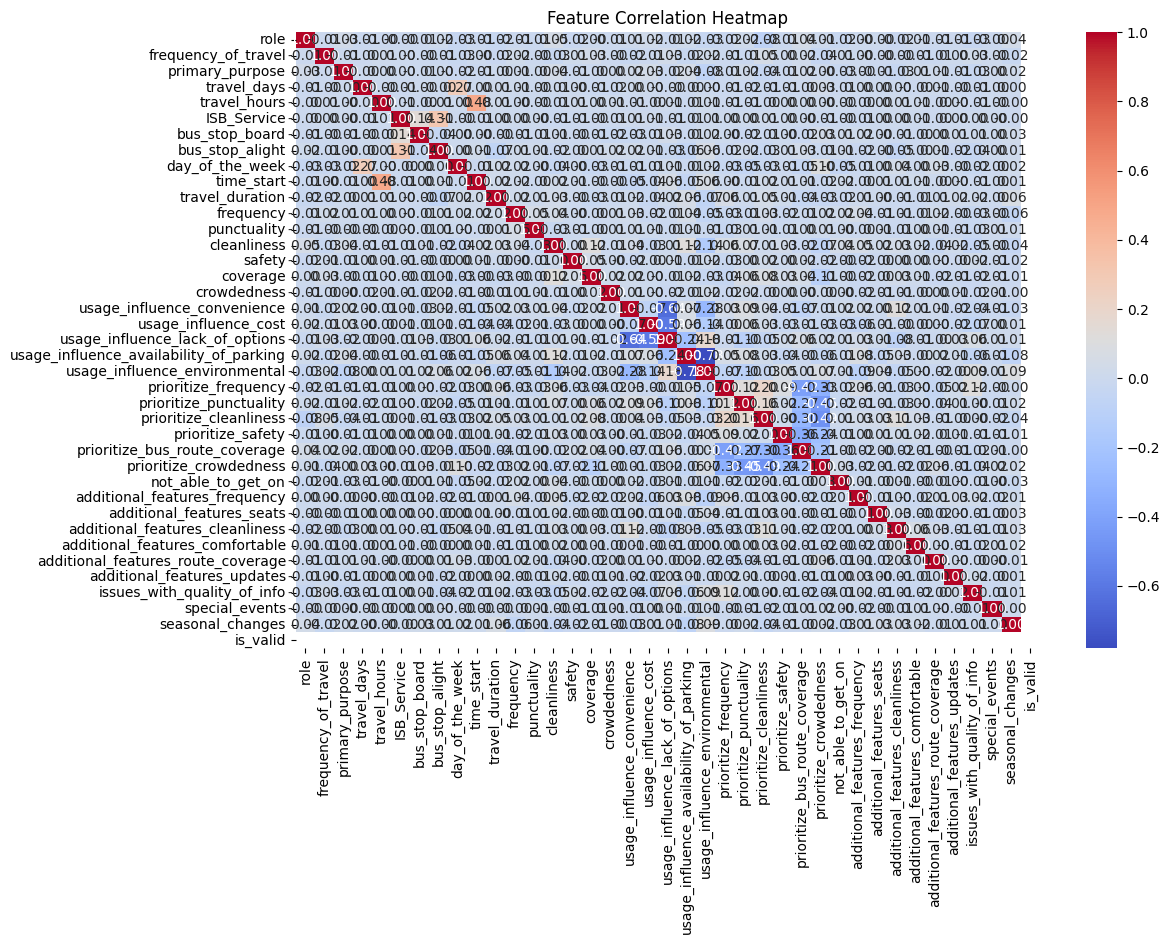

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display correlation heatmap to examine feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold to remove features with low variance (tweak as needed)
selector = VarianceThreshold(threshold=0.01)
data_reduced = selector.fit_transform(data)


In [14]:
import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features
data = data.drop(to_drop, axis=1)
print(f"Features dropped due to high correlation: {to_drop}")


Features dropped due to high correlation: []


In [15]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to a specific number of components
pca = PCA(n_components=20)  # Adjust number of components as needed
data_pca = pca.fit_transform(data)


In [16]:
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)
print("Total variance explained by selected components:", sum(pca.explained_variance_ratio_))


Explained variance ratio of each component: [0.06468792 0.05360405 0.04134121 0.03908546 0.03809013 0.03467426
 0.03289068 0.03172357 0.03060647 0.0299228  0.02849016 0.02821531
 0.02754127 0.02707454 0.02690304 0.02635617 0.02635212 0.02587801
 0.02572192 0.02567295]
Total variance explained by selected components: 0.6648320409596731


In [17]:
# Display the components (principal axes) and their contributions to each original feature
components = pd.DataFrame(pca.components_, columns=data.columns)
print("Principal Component contributions to original features:\n", components)


Principal Component contributions to original features:
         role  frequency_of_travel  primary_purpose  travel_days  travel_hours  \
0  -0.006769             0.016581        -0.042813     0.023072      0.038811   
1   0.074365            -0.053250         0.073116     0.041856     -0.046111   
2   0.037177             0.032178         0.060812    -0.047853      0.046348   
3   0.027701             0.052662         0.017525    -0.096651      0.601544   
4   0.093128             0.097386         0.044506    -0.232203     -0.345549   
5   0.048204            -0.070741         0.056944     0.040707     -0.006058   
6  -0.155666             0.063508        -0.083437     0.546933     -0.069731   
7  -0.172810             0.092163        -0.204606    -0.221629     -0.087535   
8   0.360920            -0.208507         0.217709     0.061312     -0.033985   
9   0.080478            -0.140480        -0.030871    -0.037804     -0.002670   
10  0.043553            -0.126376         0.130058  

In [18]:
# Print column names and first few rows to identify a potential target variable
print("Column names in dataset:", data.columns)
print("\nFirst few rows of the dataset:")
print(data.head())


Column names in dataset: Index(['role', 'frequency_of_travel', 'primary_purpose', 'travel_days',
       'travel_hours', 'ISB_Service', 'bus_stop_board', 'bus_stop_alight',
       'day_of_the_week', 'time_start', 'travel_duration', 'frequency',
       'punctuality', 'cleanliness', 'safety', 'coverage', 'crowdedness',
       'usage_influence_convenience', 'usage_influence_cost',
       'usage_influence_lack_of_options',
       'usage_influence_availability_of_parking',
       'usage_influence_environmental', 'prioritize_frequency',
       'prioritize_punctuality', 'prioritize_cleanliness', 'prioritize_safety',
       'prioritize_bus_route_coverage', 'prioritize_crowdedness',
       'not_able_to_get_on', 'additional_features_frequency',
       'additional_features_seats', 'additional_features_cleanliness',
       'additional_features_comfortable', 'additional_features_route_coverage',
       'additional_features_updates', 'issues_with_quality_of_info',
       'special_events', 'seasonal_c

In [19]:
print("Unique values in issues_with_quality_of_info:", data['issues_with_quality_of_info'].unique())
print("Unique values in not_able_to_get_on:", data['not_able_to_get_on'].unique())
print("Unique values in additional_features_cleanliness:", data['additional_features_cleanliness'].unique())




Unique values in issues_with_quality_of_info: [ 0.97509953 -1.02553633]
Unique values in not_able_to_get_on: [ 0.62248458 -1.29816975  1.58281175 -0.33784258]
Unique values in additional_features_cleanliness: [ 0.75847311 -0.14136382 -1.04120075 -1.94103768 -2.84087461]


In [26]:
# Define the target variable
target_column = 'issues_with_quality_of_info'  # Update this if you choose a different column

# Separate the target and features
y = data[target_column]
X = data.drop(target_column, axis=1)

import pandas as pd
from sklearn.decomposition import PCA

# Define the target variable
target_column = 'issues_with_quality_of_info'  # Update this if you choose a different column
y = data[target_column]
X = data.drop(target_column, axis=1)

# Apply PCA to the feature set
pca = PCA(n_components=20)  # Adjust number of components as needed
X_pca = pca.fit_transform(X)

# Convert PCA result to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the target variable back to the DataFrame
X_pca_df[target_column] = y.reset_index(drop=True)

# Now X_pca_df is ready to use
print(X_pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.641050 -0.627866 -1.416851 -0.709584  1.305108  0.339241 -0.117603   
1  0.533912 -1.268970 -1.073798 -0.850475  1.112755  1.110473  1.728931   
2  3.127092  0.708140 -0.446072  1.144019 -1.983626  0.549128 -0.374690   
3 -0.298523 -0.116321  1.212822 -0.107793  0.246898  0.297392 -0.019008   
4 -1.392719  1.292707  0.081321 -1.598583  1.604713 -1.698930  1.340042   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0  1.598724 -0.537072 -0.553920  ... -0.068684  0.447337  0.559385  0.628590   
1  0.067786 -0.234486 -0.837779  ...  0.585894 -0.711046 -1.327723  0.261944   
2 -0.255985  2.156681  0.747021  ... -1.175288  1.775278  0.901368 -0.379108   
3  0.327636 -2.008805  0.876518  ...  1.657061 -0.470967 -0.644883  0.682901   
4 -1.083443  0.257262  0.554080  ...  1.025749 -0.161178  0.964562 -1.040504   

       PC16      PC17      PC18      PC19      PC20  \
0 -0.063854 -

In [27]:
import pandas as pd

# Convert PCA result to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the target variable back to the DataFrame
X_pca_df[target_column] = y.reset_index(drop=True)



In [28]:
from sklearn.model_selection import train_test_split

# Define features and target for the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (44680, 20)
Test set size: (11170, 20)


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming `data` is your DataFrame and `target_column` is the name of your target variable

# Step 1: Define Target Variable and Features
target_column = 'issues_with_quality_of_info'  # Replace with the correct target column name
y = data[target_column]
X = data.drop(target_column, axis=1)

# Step 2: Apply PCA to the Feature Set
pca = PCA(n_components=20)  # Adjust number of components as needed
X_pca = pca.fit_transform(X)

# Check variance explained by each component
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)
print("Total variance explained by selected components:", sum(pca.explained_variance_ratio_))

# Step 3: Convert PCA Output to DataFrame and Add Target Variable
# Convert PCA result to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the target variable back to the DataFrame
X_pca_df[target_column] = y.reset_index(drop=True)

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Train a Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Explained variance ratio of each component: [0.06632548 0.05442686 0.04245836 0.04001342 0.03911777 0.0355711
 0.03369375 0.03258054 0.03099828 0.0302884  0.02919826 0.02861347
 0.02795118 0.02780058 0.02762939 0.02706781 0.02678936 0.02657297
 0.02640583 0.02632681]
Total variance explained by selected components: 0.6798296293612047
Root Mean Squared Error (RMSE): 0.9905605627116496
Mean Absolute Error (MAE): 0.9696170386041498
R-squared (R²): 0.018347909128362372


c:\Users\jingc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Linear Regression:
RMSE: 0.9882377823171089
MAE: 0.9746871512693825
R-squared: 0.022946292959249992


c:\Users\jingc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Gradient Boosting Regressor:
RMSE: 0.9862954368628833
MAE: 0.973656886604856
R-squared: 0.026783245675717438


c:\Users\jingc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


XGBoost Regressor:
RMSE: 1.0110239797739466
MAE: 0.9592274914065821
R-squared: -0.022629795085652438


c:\Users\jingc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
